# 기술통계 관련 코드 

In [10]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
import matplotlib.font_manager as fm
from scipy.stats import shapiro



In [6]:
df = pd.read_csv("mycars.csv", engine='python') #csv불러오기
df.head() #상위꺼 보여주는거 -> 주로 일단 데이터 모양이 어떻게 생겼는지?, column 뭐있는지 확인할 때 사용한다. 

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [7]:
df.describe() #숫자로 된 거 다 계산해서 여러가지 계산한거 보여줌. 전체 몇개인지, 평균, 이런거

,displacement,year,cylinder,mpg,highway_mileage
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [8]:
ds = df[['model', 'mpg']]
ds.groupby('model').describe() #그룹지어서 처리


mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [9]:
count = df['manufacturer'].value_counts().sort_index() #속성값 개수랑 순서대로 정렬한는거
cumcnt = np.cumsum(count) #수 누적으로 더해버려 
percent = count /sum(count) * 100 # 비율 구하기
cumpct = np.cumsum(percent) #누적 비율 구하기 

#DataFrame{(이름:값)} -> 새로 데이터 테이블 만들어줌
count_data = pd.DataFrame({'Count':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct}) 

count_data

,Count,CumCnt,Percent,CumPct
audi,18,18,7.692308,7.692308
chevrolet,19,37,8.119658,15.811966
dodge,37,74,15.811966,31.623932
ford,25,99,10.683761,42.307692
honda,9,108,3.846154,46.153846
hyundai,14,122,5.982906,52.136752
jeep,8,130,3.418803,55.555556
land rover,4,134,1.709402,57.264957
lincoln,3,137,1.282051,58.547009
mercury,4,141,1.709402,60.256410


# 정규분포 관련 코드 

대충 평균, 표준편차 주어지고, 대상값 주어준 다음에 비율 뭐냐고 물어보는 문제 

In [7]:
mu = 25.45
sigma = 4.76
x= 35

#이거 확률 구하는 게 중요하다. 누적으로 해서 구해버림 -> 그리고 이상이라면 1-prob로 하고 이하면 그냥 그 값 쓰면되고
prob = stats.t.cdf(x,mu,sigma) #대상,평균,표준편차
print("{0}분 이상 걸리는 A/S 작업 비율 : {1:.1f}%".format(x,(1-prob)*100))
print("%s분 이상 걸리는 A/S 작업 비율 : %.1f" %(x,(1-prob)*100)+"%")

35분 이상 걸리는 A/S 작업 비율 : 0.0%
35분 이상 걸리는 A/S 작업 비율 : 0.0%


# t분포 관련코드

In [13]:
t = 2.0
df = 100

#이게 t분포에서 누적확률 구할때 쓰는건데 t분포의 t를 따서 사용하니까 무난한데 parameter가 t값(이건주어짐)이랑 자유도가 들어간다.
prob = stats.t.cdf(t,df)

print("P(T<=F): %.3f"%(prob)) 

P(T<=F): 0.976


# 카이제곱 관련코드

In [15]:
chisq = 10
df = 30

#카이제곱값이랑 자유도 줌 역시 카이제곱은 chi2이니까 비슷.
prob = stats.chi2.cdf(chisq,df)
print("P(X<=%d) : %.4f" %(chisq,prob))

P(X<=10) : 0.0002


# F분포 관련코드

In [18]:
f = 2.0
dfnum = 15
dfden = 15

#f분포니까 f이고, 자유도 2개를 준다 f통계량값도 주고 확률 구하는거야 그 다음이니까 쉽지
prob = stats.f.cdf(x=f, dfn = dfnum, dfd=dfden)
print("P(X<=F):%.3f" %(prob))

P(X<=F):0.904


# 이항분포 관련코드 

In [5]:
n = 5
for i in range(n+1):
    
    
    #bi=2항 nom=분포 => 이항분포 (대상, 총개수, 확률)
    prob = stats.binom.pmf(k=i, n=n, p=0.05)
    prob1 = stats.binom.pmf(k=i, n=n, p=0.6)
    print("P(X=%d) = %.3f" %(i, prob))

print(1-0.978)
    
#     print("P1(X=%d) = %.3f" %(i, prob))

P(X=0) = 0.774
P(X=1) = 0.204
P(X=2) = 0.021
P(X=3) = 0.001
P(X=4) = 0.000
P(X=5) = 0.000
0.02200000000000002


# 포아송분포 관련코드

In [23]:
mu = 2

#포아송(대상 ,평균)
prob= stats.poisson.pmf(2,mu)
cdf_prob = stats.poisson.cdf(2,mu)
print("1분당 %d번의 전화가 걸어올 확률 : %.1f" %(mu, prob*100)+"%")
print("1분당 %d번 이하의 전화가 걸어올 확률 : %.1f" %(2, cdf_prob*100)+"%")
print("1분당 %d번 이상의 전화가 걸어올 확률 : %.1f" %(2, (1-cdf_prob+prob)*100)+"%")
print("1분당 %d번 초과의 전화가 걸어올 확률 : %.1f" %(2, (1-cdf_prob)*100)+"%")

1분당 2번의 전화가 걸어올 확률 : 27.1%
1분당 2번 이하의 전화가 걸어올 확률 : 67.7%
1분당 2번 이상의 전화가 걸어올 확률 : 59.4%
1분당 2번 초과의 전화가 걸어올 확률 : 32.3%


# 정규성 검정

In [25]:
from scipy.stats import shapiro

camshaft = pd.read_csv("camshaft.csv", engine="python")
camshaft.head() 
data = camshaft['Supp1']
shapiro(data)

#여기보면 shapiro를 통해 정규성을 검정했을 때 p값이 0.05보다 크니까 안정권에 들어온건 맞지? -> 그니까 정규분포를 따른다 이말이야/
#p-value가 유의수준보다 커야 의미가 있음.

(0.9788156747817993, 0.10744144767522812)

# 모평균추정(모표준편차 아는경우)

In [26]:
df = pd.DataFrame({"sample": [3.6,2.9,2.8,2.6,3.4,3.2,2.2,2.6,2.6,2.4
                              ,2.4,2.6,3.4,2.4,2.1,2.6,3.0,2.4,2.7,2.4
                              ,2.6,2.9,2.9,2.0,2.7,2.2,2.8,2.7,1.8,2.5
                              ,3.0,3.2,2.8,2.6,3.2,3.1,2.9,2.7,2.7,2.2]})
df.head()

#모표준편차 아니까 norm이겠지? -> 신뢰수준, loc=평균, scale=표준편차
lower, upper = stats.norm.interval(0.95, loc=np.mean(df), scale =0.397/np.sqrt(40))
print("신뢰구간 : %f, %f" %(lower, upper))

신뢰구간 : 2.571971, 2.818029


# 모평균추정(모표준편차 모르는경우)

In [29]:
df =pd.DataFrame({"sample":[54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8
                           ,54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,53.9,55.0]})

#표본표준편차라고 함. 표본이니까 sample이다 기억해~!
#아까 모표준편차 모르면 t분포 쓴다고했지? 그걸로 가는건데, 이건 이제 자유도가 하나 들어가야해, scale=scipy.stats.sem(df) 쓰는거지
lower, upper = stats.t.interval(0.95, len(df)-1, loc=np.mean(df), scale=scipy.stats.sem(df))
print("신뢰구간 : %.2f, %.2f" %(lower,upper))

신뢰구간 : 54.39, 55.33


# 평균검정할때(1 sample t-test)


In [34]:
df = pd.DataFrame({"sample" :[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})

#우선 1 sample t-test 진행해서 t값이랑 p값 구함
t_result = stats.ttest_1samp(df,78.0)

#그 값을 바탕으로 임계값 구하는데 이건 양측검정이니까 유의수준 반으로 나누고, 자유도 넣어줌
z = stats.t.ppf(0.975,9)

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print(shapiro(df))
print("1-sample t-test ")
print("t통계량 %f" %(t))
print("p-value %f" %(p))
print()
print("shapiro함수를 통해 정규성을 검사한 결과 검정통계량이 약 0.054로 0.05보다 높으므로 정규성을 만족한다고 볼 수 있다.")
print()
print("1. 가설수립")
print("귀무가설(HO):mu = 78.0")
print("대립가설(H1):mu != 78.0")
print("유의수준(a) = 0.05")
print()
print("2. 가설검정수행")
print("a = 0.05수준에서 귀무가설을 기각하기 위해서 요구되는 최소한의 t값(임계값)\nt(0.025,9) = %f" %(z))
print()
print("3. 검정결과판단")
print("p-value가 유의수준 0.05보다 작고, t통계량(검정통계량)이 임계값보다 크므로 귀무가설 H0을 기각하고 대립가설 H1를 채택한다.\n\
즉 과제 수행자의 개선활동이 고객만족도를 변화시켰다고 볼 수 있다.")

(0.8473219275474548, 0.053975414484739304)
1-sample t-test 
t통계량 3.379000
p-value 0.008000

shapiro함수를 통해 정규성을 검사한 결과 검정통계량이 약 0.054로 0.05보다 높으므로 정규성을 만족한다고 볼 수 있다.

1. 가설수립
귀무가설(HO):mu = 78.0
대립가설(H1):mu != 78.0
유의수준(a) = 0.05

2. 가설검정수행
a = 0.05수준에서 귀무가설을 기각하기 위해서 요구되는 최소한의 t값(임계값)
t(0.025,9) = 2.262157

3. 검정결과판단
p-value가 유의수준 0.05보다 작고, t통계량(검정통계량)이 임계값보다 크므로 귀무가설 H0을 기각하고 대립가설 H1를 채택한다.
즉 과제 수행자의 개선활동이 고객만족도를 변화시켰다고 볼 수 있다.


# 모분산 신뢰구간추정

In [30]:
prop1 = stats.norm.ppf(0.95,0,1) #Z,a/2
prop1

sample = 1600
target = 96
p = target/sample
lower,upper = p-np.sqrt(prop1*(p*(1-p)/sample)), p+np.sqrt(prop1*(p*(1-p)/sample))
print("신뢰구간 : %.2f, %.2f" %(lower,upper))

신뢰구간 : 0.05, 0.07


# 카이제곱 쓰는거 

In [31]:
df =pd.DataFrame({"sample":[12,9,10,5,16
                           ,13,5,9,8,13
                           ,16,12,12,4,14
                           ,9,11,14,9,17
                           ,5,8,9,6,11
                           ,19,6,6,8,9
                           ,13,10,8,13,19
                           ,8,12,14,16,16
                           ,11,17,5,9,12
                           ,17,11,8,5,8]})

prop1 = stats.chi2.ppf(0.975, 49)
prop2 = stats.chi2.ppf(0.025, 49) #카이제곱 임계값 구하는거

s = np.var(df['sample']) 
lower, upper = ((len(df)-1) * s) / prop1, ((len(df)-1)*s)/prop2
print("신뢰구간 : %.2f, %.2f" %(lower,upper)) #과제



신뢰구간 : 10.85, 24.15


# 카이제곱검정

In [15]:
df = pd.DataFrame({"A":[182,154], "B":[213,138], "C":[203,110]
                  })

#카이제곱검정
chi2, p, f, ex = stats.chi2_contingency(df)

#임계값은 단측검정이라 0.975가 아니라 0.95임 30은 자유도 결과값에서 나온거 넣음

th = stats.chi2.ppf(0.95,30)
print(th)
print(chi2)
print(p)
print(f)
print(ex)

"""
카이제곱 통계량은 98, 임계값은 43이며 p값이 0.05보다 작으니까 귀무가설 기각하고, 대립가설 채택임

"""

43.77297182574219
7.878211595034106
0.019465613164995288
2
[[200.928 209.898 187.174]
 [135.072 141.102 125.826]]


'\n카이제곱 통계량은 98, 임계값은 43이며 p값이 0.05보다 작으니까 귀무가설 기각하고, 대립가설 채택임\n\n'

# ANOVA 검정

In [43]:
fe = pd.read_csv("ANOVA.csv", engine="python")
fe_remake = pd.pivot_table(fe,index = 'charge', values = 'time', columns='gangjong')
print(fe_remake)

fe_result = stats.f_oneway(fe_remake['a'], fe_remake['b'],fe_remake['c'],fe_remake['d'])
f, p = fe_result.statistic.round(3), fe_result.pvalue.round(3)


print("One-way")
print("F 통계량 : %f" %f)
print("p-value: %f" %p)
print()
print("1. 가설수립")
print("귀무가설(HO):강종별 2차정련 시간에 차이가 없다.")
print("대립가설(H1):적어도 2개이상의 강종별 2차정련 시간에 차이가 있다.")
print("유의수준(a) = 0.05")
print()
print("2. 가설검정수행")
print("유의수준 5%에서 검정결과 p-value값이 0.05보다 작은 0.019이므로 귀무가설을 기각한다.")
print()
print("3. 검정결과판단")
print("귀무가설 H0을 기각하고 대립가설 H1를 채택한다.\n 즉 적어도 2개이상의 강종별 2차정련 시간에 차이가 있다고 볼 수 있다.")



gangjong     a     b     c     d
charge                          
A         32.2  33.1  32.6  26.7
B         30.4  29.9  32.7  28.5
C         33.6  31.7  29.3  30.9
D         36.4  27.5  25.9  26.2
E         33.9  34.0  31.1  32.3
F         34.9  30.7  23.8  23.7
One-way
F 통계량 : 4.172000
p-value: 0.019000

1. 가설수립
귀무가설(HO):강종별 2차정련 시간에 차이가 없다.
대립가설(H1):적어도 2개이상의 강종별 2차정련 시간에 차이가 있다.
유의수준(a) = 0.05

2. 가설검정수행
유의수준 5%에서 검정결과 p-value값이 0.05보다 작은 0.019이므로 귀무가설을 기각한다.

3. 검정결과판단
귀무가설 H0을 기각하고 대립가설 H1를 채택한다.
 즉 적어도 2개이상의 강종별 2차정련 시간에 차이가 있다고 볼 수 있다.




# 2sample t-test

In [36]:
"""
2sample 순서
1. 정규성 검정(shapiro를 이용해서)
2. 등분산성 검정 (stats.levene(대상1, 대상2)) 하고 만족여부에 따라 equal_var값이 True or False가 될 수 있음
3. 2sample 검정 시작 -> stats.ttest_ind(대상1,대상2,equal_var)
4. 프린트해서 값 확인한 후 임계값 설정(stats.t.ppf)
5. 검정통계량이랑 임계값 비교
"""

+

(0.9094840288162231, 0.06230909377336502)
(0.8978105783462524, 0.03752673789858818)
LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)
[-3.12230485] [0.00342365] -2.0930240544082634


# paired t-test

In [38]:
dfb = pd.DataFrame({"before" : [720,589,780,648,720,589,780,648,780,648]})
dfa = pd.DataFrame({"after" : [710,580,787,712,750,600,782,670,790,680]})

#paired ttest는 정규성 검정 안해도됨
#t값이 음수가 나오면 더 안좋아진거고, 양수가 나오면 더 좋아진거

t_result = stats.ttest_rel(dfb,dfa)
t, p = t_result.statistic, t_result.pvalue
print(t,p)
th = stats.t.ppf(0.025,9)
print(th)

[-2.26606522] [0.04968162]
-2.262157162740992


# 1proportion test

In [39]:
count = 15
n = 100
p = 0.1

#얘네는 ztest쓰는데 원래 비율과 비교도 함 그리고 z니까 임계값도 norm.ppf 써서 구한다 이말이지
stat,p = proportions_ztest(count, n, p)
th = stats.norm.ppf(0.975)
print(stat, p,th)

1.4002800840280094 0.16142946236708322 1.959963984540054


# 2proportion test

In [40]:
count = np.array([4,1]) #여기서 np.array로 짝지어줌
n = np.array([1000,1200]) # 시도횟수도 그렇게
stat, p = proportions_ztest(count, n) #검정 진행 
print(stat,p)
th = stats.norm.ppf(0.975)
print(th)

1.553109404737079 0.12039699966295712
1.959963984540054


# 상관분석

In [45]:
strength = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,
            36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
temper = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]


#stats.pearsonr쓰면 상관관계 분석가능 
corr, pval = stats.pearsonr(strength, temper)

print("Correlation Analysis ")
print("corr :%f" %corr)
print("p-value :%f" %pval)
print()
print("1. 가설수립")
print("귀무가설(HO):초코칩의 강도와 재료 반죽온도간의 상관계수는 0이다.")
print("대립가설(H1):초코칩의 강도와 재료 반죽온도간의 상관계수가 0이 아니다.")
print()
print("2. 가설검정수행")
print("검정결과 p-value값이 0.05보다 작은 0.000315이므로 귀무가설을 기각한다.")
print()
print("3. 검정결과판단")
print("귀무가설 H0을 기각하고 대립가설 H1를 채택한다.\n 즉 초코칩의 강도와 재료 반죽 온도간의 상관계수는 0이 아니며, 서로 음의 상관 관계를 가진다.")



Correlation Analysis 
corr :-0.723107
p-value :0.000315

1. 가설수립
귀무가설(HO):초코칩의 강도와 재료 반죽온도간의 상관계수는 0이다.
대립가설(H1):초코칩의 강도와 재료 반죽온도간의 상관계수가 0이 아니다.

2. 가설검정수행
검정결과 p-value값이 0.05보다 작은 0.000315이므로 귀무가설을 기각한다.

3. 검정결과판단
귀무가설 H0을 기각하고 대립가설 H1를 채택한다.
 즉 초코칩의 강도와 재료 반죽 온도간의 상관계수는 0이 아니며, 서로 음의 상관 관계를 가진다.


# 회귀분석

In [13]:
streng = [0.4,1.3,2.2,2.5,2.4,2.0,1.5]
bake_time = [-3,-2,-1,0,1,2,3]

#이걸로 절편구하는건데, X값 넣어주는거다.
bake_time = sm.add_constant(bake_time)

#Y, X순으로 parameter입력
model = sm.OLS(streng, bake_time)
result = model.fit()
print(result.summary())
print()
print("결론 : 회귀식은 strength = 13.0013 + 30.8722*baking time\n 설명력은 R-Sq = 64.6%이다.")
print()
print("1. 가설수립")
print("귀무가설(HO):초코칩의 강도와 굽는 시간과의 인과관계는 없다.")
print("대립가설(H1):초코칩의 강도와 굽는 시간과의 인과관계가 있다.")
print()
print("2. 가설검정수행")
print("검정결과 p-value값이 0.05보다 작으므로 귀무가설을 기각한다.")
print()
print("3. 검정결과판단")
print("귀무가설 H0을 기각하고 대립가설 H1를 채택한다.\n 즉 초코칩의 강도와 재료 반죽 온도간의 인과관계가 존재한다.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1.729
Date:                Fri, 31 Jan 2020   Prob (F-statistic):              0.246
Time:                        17:57:44   Log-Likelihood:                -6.3003
No. Observations:                   7   AIC:                             16.60
Df Residuals:                       5   BIC:                             16.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7571      0.266      6.602      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


등분산성 검정
표준화된 잔차들을 이용하여 변수들의 산점도를 그려보면, 이들 잔차들이 0을 중심으로 랜덤하게는 보이나, 대칭적이지 않다. 그러므로 등분산성을 만족한다고 볼 수 없다.


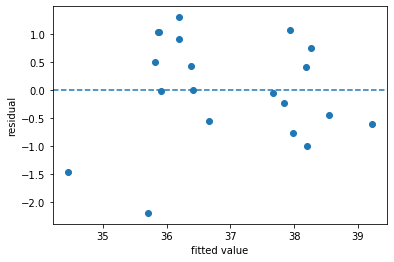

In [48]:
"""
잔차검증은 정규성, 등분산성, 독립성 이렇게 3개를 확인해야함 
그래서 정규성은 shapiro쓰고 0.05넘는지 확인
독립성은 
Durbin - Watson값 확인할껀데 이게 0에가까우면 양의 상관관계, 2에 가까우면 아무상관x, 4에 가까우면 음의 상관관계를 지님 -> 독립성이 있다는건 상관관계를 지니지 않는다는것
"""

print("등분산성 검정")
plt.scatter(result.fittedvalues,result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")
print("표준화된 잔차들을 이용하여 변수들의 산점도를 그려보면, 이들 잔차들이 0을 중심으로 랜덤하게는 보이나, 대칭적이지 않다. 그러므로 등분산성을 만족한다고 볼 수 없다.")

In [14]:
shapiro(result.resid)


(0.8914536833763123, 0.28233224153518677)